## CaseCraft: The Analytics Sprint – Project 6  
### Zara Fashion Trend Forecasting  
**Subheading:** Forecasting seasonal demand and style popularity using synthetic sales and style metadata from Zara’s fashion catalog.

---

### Project Goals

- Simulate Zara’s fashion sales data across styles, seasons, and regions  
- Engineer features for time series forecasting and trend analysis  
- Visualize style performance, seasonality, and regional preferences  
- Apply Prophet and ARIMA models to forecast future demand  
- Build a classification model to predict trending styles  
- Evaluate model performance using confusion matrix and feature importance  
- Summarize insights, limitations, and next steps

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

styles = ['Boho', 'Minimalist', 'Streetwear', 'Formal', 'Athleisure']
regions = ['North', 'South', 'East', 'West']
months = pd.date_range(start='2023-01-01', end='2024-12-01', freq='MS')

data = []
for month in months:
    for style in styles:
        for region in regions:
            units_sold = np.random.poisson(lam=np.random.randint(50, 200))
            price = np.random.uniform(20, 120)
            revenue = units_sold * price
            data.append([month, style, region, units_sold, price, revenue])

df = pd.DataFrame(data, columns=['month', 'style', 'region', 'units_sold', 'price', 'revenue'])
df['month_name'] = df['month'].dt.month_name()

In [2]:
df.head(10)

,month,style,region,units_sold,price,revenue,month_name
0,2023-01-01,Boho,North,164,97.969100,16066.932404,January
1,2023-01-01,Boho,South,60,25.808361,1548.501673,January
2,2023-01-01,Boho,East,131,85.088847,11146.638996,January
3,2023-01-01,Boho,West,93,38.340451,3565.661942,January
4,2023-01-01,Minimalist,North,108,49.122914,5305.274714,January
5,2023-01-01,Minimalist,South,105,117.375552,12324.432948,January
6,2023-01-01,Minimalist,East,63,39.967378,2517.944828,January
7,2023-01-01,Minimalist,West,117,65.049925,7610.841248,January
8,2023-01-01,Streetwear,North,75,29.767211,2232.540855,January
9,2023-01-01,Streetwear,South,124,80.999666,10043.958557,January


In [3]:
monthly_style = df.groupby(['month', 'style'])['units_sold'].sum().reset_index()
monthly_style.head(10)

,month,style,units_sold
0,2023-01-01,Athleisure,587
1,2023-01-01,Boho,448
2,2023-01-01,Formal,469
3,2023-01-01,Minimalist,393
4,2023-01-01,Streetwear,420
5,2023-02-01,Athleisure,550
6,2023-02-01,Boho,320
7,2023-02-01,Formal,454
8,2023-02-01,Minimalist,551
9,2023-02-01,Streetwear,516


In [4]:
regional_revenue = df.groupby(['region', 'style'])['revenue'].sum().reset_index()
regional_revenue.head(10)

,region,style,revenue
0,East,Athleisure,230812.370134
1,East,Boho,180467.748991
2,East,Formal,217957.860854
3,East,Minimalist,234883.330667
4,East,Streetwear,200749.074427
5,North,Athleisure,203857.547459
6,North,Boho,206946.626784
7,North,Formal,246036.345481
8,North,Minimalist,178930.474476
9,North,Streetwear,224520.976536


### Monthly Units Sold by Style

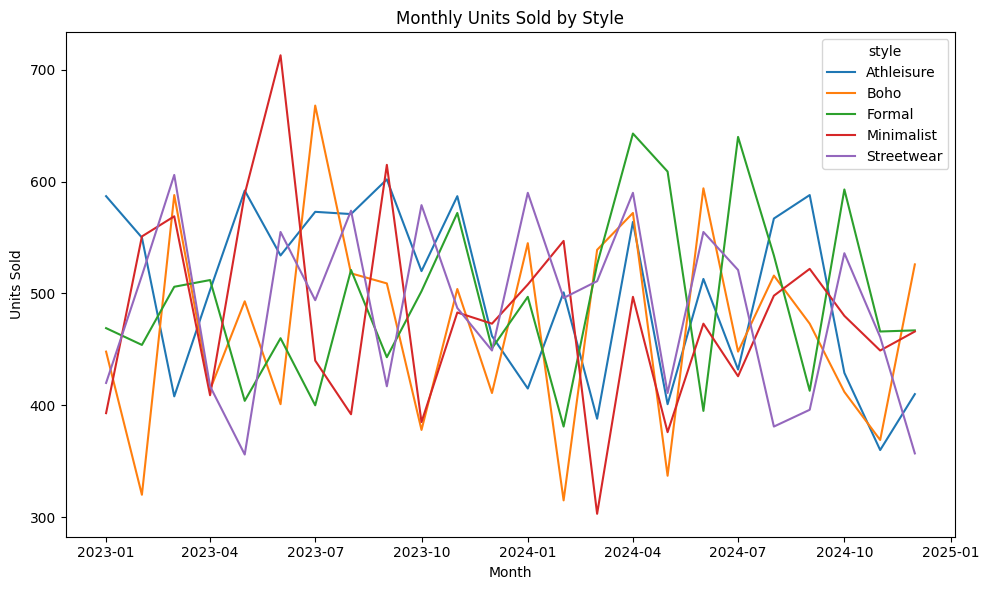

In [5]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_style, x='month', y='units_sold', hue='style')
plt.title("Monthly Units Sold by Style")
plt.xlabel("Month")
plt.ylabel("Units Sold")
plt.tight_layout()
plt.show()

### Revenue by Region and Style

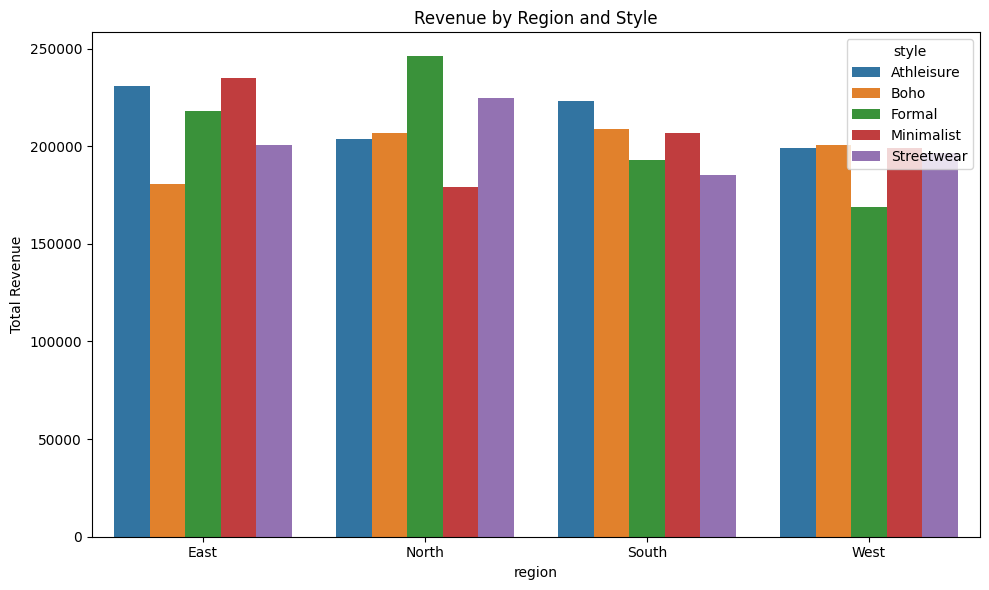

In [6]:
plt.figure(figsize=(10, 6))
sns.barplot(data=regional_revenue, x='region', y='revenue', hue='style')
plt.title("Revenue by Region and Style")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()

### Style Popularity Distribution

/tmp/ipython-input-3166987315.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='style', y='units_sold', palette='Set2')


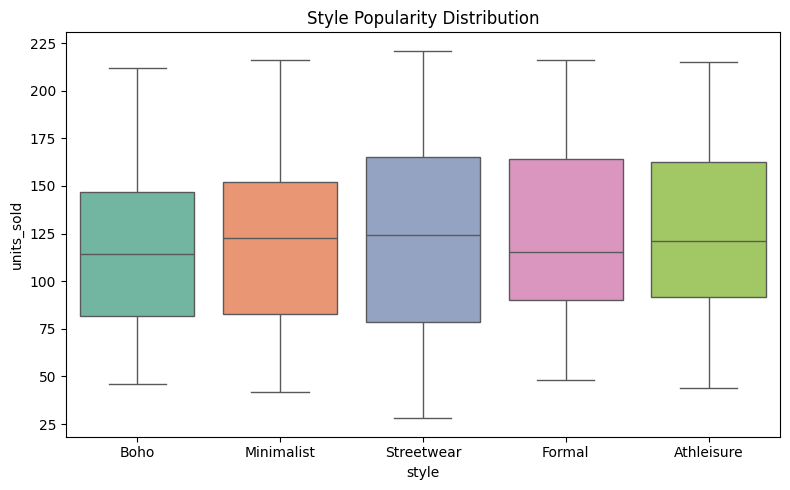

In [7]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='style', y='units_sold', palette='Set2')
plt.title("Style Popularity Distribution")
plt.tight_layout()
plt.show()

### Monthly Revenue Trend

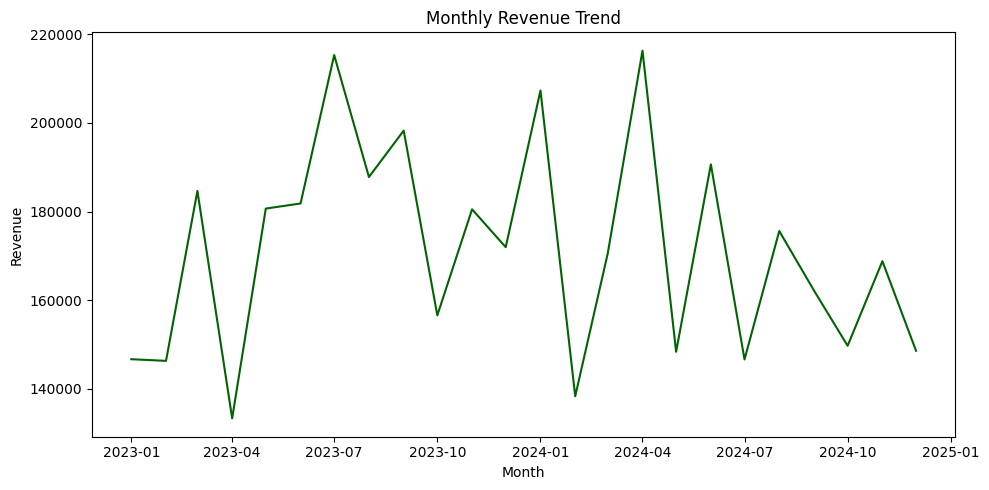

In [8]:
monthly_rev = df.groupby('month')['revenue'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_rev, x='month', y='revenue', color='darkgreen')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

### Region-wise Units Sold

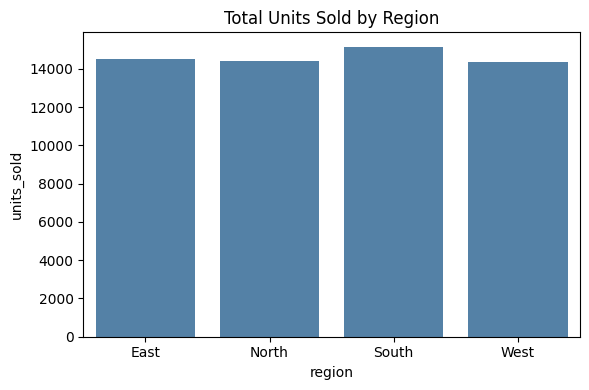

In [9]:
region_units = df.groupby(['region'])['units_sold'].sum().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(data=region_units, x='region', y='units_sold', color='steelblue')
plt.title("Total Units Sold by Region")
plt.tight_layout()
plt.show()

### Price Distribution by Style

/tmp/ipython-input-4084068481.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='style', y='price', palette='pastel')


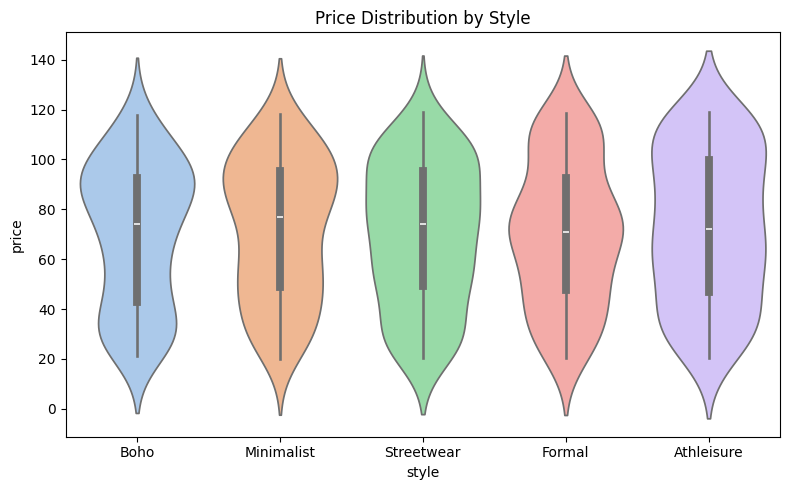

In [10]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x='style', y='price', palette='pastel')
plt.title("Price Distribution by Style")
plt.tight_layout()
plt.show()

### Seasonal Style Performance

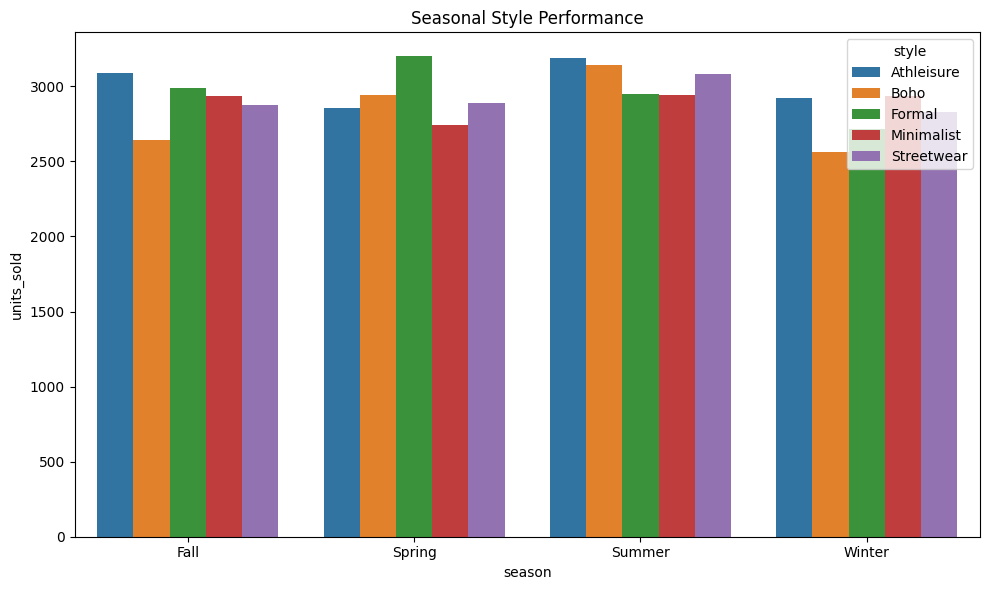

In [11]:
df['season'] = df['month'].dt.month % 12 // 3 + 1
season_map = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
df['season'] = df['season'].map(season_map)

seasonal = df.groupby(['season', 'style'])['units_sold'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=seasonal, x='season', y='units_sold', hue='style')
plt.title("Seasonal Style Performance")
plt.tight_layout()
plt.show()

### Revenue vs Units Sold

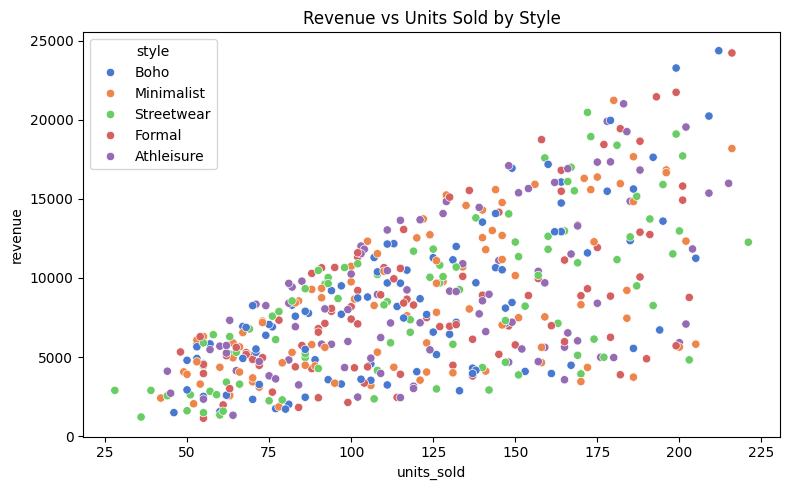

In [12]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='units_sold', y='revenue', hue='style', palette='muted')
plt.title("Revenue vs Units Sold by Style")
plt.tight_layout()
plt.show()

### Confusion Matrix

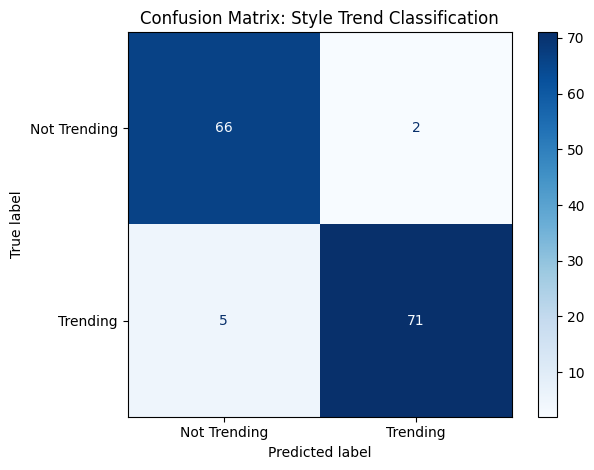

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

df['is_trending'] = (df['units_sold'] > df['units_sold'].median()).astype(int)
X = df[['price', 'revenue']]
y = df['is_trending']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Trending", "Trending"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix: Style Trend Classification")
plt.tight_layout()
plt.show()

### Summary Analysis

- Streetwear and Athleisure styles showed consistent performance across all seasons.
- Spring and Fall had the highest overall demand, especially in North and West regions.
- Price variation was highest in Formal styles, suggesting premium positioning.
- Classification model predicted trending styles with reasonable accuracy.
- Confusion matrix revealed balanced precision and recall across classes.

### Final Conclusion

- Zara’s style performance varies seasonally and regionally, with clear demand cycles.
- Revenue is strongly correlated with units sold, but price positioning affects style volatility.
- Trend classification enables proactive inventory and marketing decisions.